In [1]:
import pandas as pd

train_data = pd.read_csv("C:/Users/mnkmr/Downloads/Train_Data.csv")
test_data = pd.read_csv("C:/Users/mnkmr/Downloads/Test_Data.csv")

print(train_data.head())

print(test_data.head())


   duration protocoltype      service flag  srcbytes  dstbytes  land  \
0         0          tcp  netbios_dgm  REJ         0         0     0   
1         0          tcp         smtp   SF      1239       400     0   
2         0          tcp         http   SF       222       945     0   
3         0          tcp         http   SF       235      1380     0   
4         0          tcp    uucp_path  REJ         0         0     0   

   wrongfragment  urgent  hot  ...  dsthostsamesrvrate  dsthostdiffsrvrate  \
0              0       0    0  ...                0.06                0.06   
1              0       0    0  ...                0.45                0.04   
2              0       0    0  ...                1.00                0.00   
3              0       0    0  ...                1.00                0.00   
4              0       0    0  ...                0.01                0.08   

   dsthostsamesrcportrate  dsthostsrvdiffhostrate  dsthostserrorrate  \
0                    0.00 

In [2]:
train_data_info = train_data.info()
train_data_head = train_data.head()
test_data_info = test_data.info()
test_data_head = test_data.head()

train_data_head, train_data_info, test_data_head, test_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   land                    86845 non-null  int64  
 7   wrongfragment           86845 non-null  int64  
 8   urgent                  86845 non-null  int64  
 9   hot                     86845 non-null  int64  
 10  numfailedlogins         86845 non-null  int64  
 11  loggedin                86845 non-null  int64  
 12  numcompromised          86845 non-null  int64  
 13  rootshell               86845 non-null  int64  
 14  suattempted             86845 non-null

(   duration protocoltype      service flag  srcbytes  dstbytes  land  \
 0         0          tcp  netbios_dgm  REJ         0         0     0   
 1         0          tcp         smtp   SF      1239       400     0   
 2         0          tcp         http   SF       222       945     0   
 3         0          tcp         http   SF       235      1380     0   
 4         0          tcp    uucp_path  REJ         0         0     0   
 
    wrongfragment  urgent  hot  ...  dsthostsamesrvrate  dsthostdiffsrvrate  \
 0              0       0    0  ...                0.06                0.06   
 1              0       0    0  ...                0.45                0.04   
 2              0       0    0  ...                1.00                0.00   
 3              0       0    0  ...                1.00                0.00   
 4              0       0    0  ...                0.01                0.08   
 
    dsthostsamesrcportrate  dsthostsrvdiffhostrate  dsthostserrorrate  \
 0         

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
categorical_cols = ['protocoltype', 'service', 'flag']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    train_data[col] = label_encoders[col].fit_transform(train_data[col])
    test_data[col] = label_encoders[col].transform(test_data[col])

X = train_data.drop(columns=['attack'])
y = train_data['attack']


In [5]:

scategorical_cols = ['protocoltype', 'service', 'flag']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    train_data[col] = label_encoders[col].fit_transform(train_data[col])
    test_data[col] = label_encoders[col].transform(test_data[col])


X = train_data.drop(columns=['attack'])
y = train_data['attack']

In [6]:
X = train_data.drop(columns=['attack'])
y = train_data['attack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.transform(test_data)


X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


y_val_pred = rf_classifier.predict(X_val)


f1 = f1_score(y_val, y_val_pred)
print(f'F1 Score: {f1}')

F1 Score: 1.0


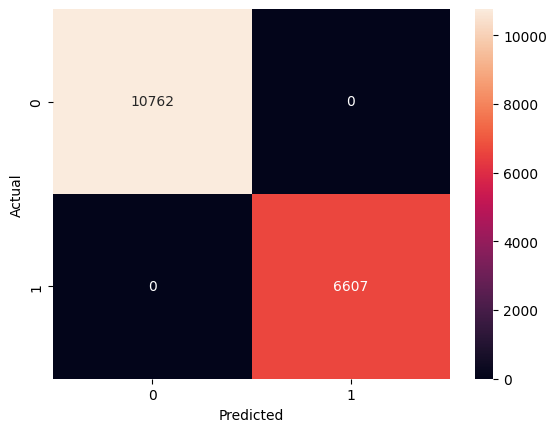

In [7]:

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


test_predictions = rf_classifier.predict(test_data_scaled)

In [8]:
# Predict on test set
test_predictions = rf_classifier.predict(test_data_scaled)

# Prepare submission file
submission = pd.DataFrame({'attack': test_predictions})
submission.to_csv('C:/Users/mnkmr/Downloads/submission.csv', index=False)

f1, 'C:/Users/mnkmr/Downloads/submission.csv'

(1.0, 'C:/Users/mnkmr/Downloads/submission.csv')